**Target:**

    -- Get the set-up right
    -- Set Transforms
    -- Set Data Loader
    -- Set Basic Working Code
    -- Set Basic Training  & Test Loop
    -- Use batch normalisation 

**Results:**

    -- Parameters: 6,383,818
    -- Best Training Accuracy: 99.99
    -- Best Test Accuracy: 99.61


**Analysis:**

    -- The accuracy is really good. There is no overfitting as the test accuracy
    is increasing along with the training accuracy
    -- model is really heavy. 6.3M parameters are really heavy

#**Import libraries**

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

#**Data Transformations (without normalization)** 

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor()
                                       ])


# **Dataset and Creating Train/Test Split (without normalization)**

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Dataloader Arguments & Test/Train Dataloaders (without normalization)**


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#**Getting data statistics (without normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1307)
 - std: tensor(0.3081)
 - var: tensor(0.0949)
torch.Size([128, 1, 28, 28])
torch.Size([128])


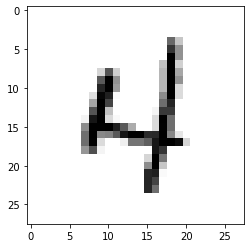

In [ ]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

#**Data Transformations (with normalization)**

In [ ]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.1307,), (0.3081,)) 
                                       ])


# **Dataset and Creating Train/Test Split (with normalization)**

In [ ]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# **Dataloader Arguments & Test/Train Dataloaders (with normalization)**


In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


#**Getting data statistics (with normalization)**
We will use the mean and standard deviation that we get from code below to normalize the data

[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(-0.4242)
 - max: tensor(2.8215)
 - mean: tensor(-0.0001)
 - std: tensor(1.0000)
 - var: tensor(1.0001)
torch.Size([128, 1, 28, 28])
torch.Size([128])


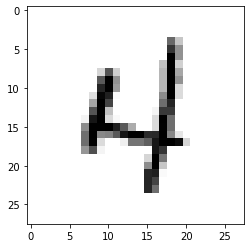

In [ ]:
import numpy as np

train_data = train.train_data
train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
print(' - mean:', torch.mean(train_data))
print(' - std:', torch.std(train_data))
print(' - var:', torch.var(train_data))

dataiter = iter(train_loader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

**Model**

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    #input block
    self.convblock1 = nn.Sequential(nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(32),
                                    nn.ReLU()) #R_in = 1, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  1+ (3-1)*1 = 3, C_out = 28
    
    #conv block 1
    self.convblock2 = nn.Sequential(nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(64),
                                    nn.ReLU()) #R_in = 3, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  3+ (3-1)*1 = 5, , C_out = 28
    
    #conv block 2
    self.convblock3 = nn.Sequential(nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(128),
                                    nn.ReLU()) #R_in = 5, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  5+ (3-1)*1 = 7, , C_out = 28
    
    #transition block1
    self.convblock4 = nn.Sequential(nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(256),
                                    nn.ReLU()) #R_in = 7, C_in = 28, K = 3, P = 1, S = 1, J_in = 1, J_out = 1, R_out = R_in + (K-1)*J_in =  7+ (3-1)*1 = 9, , C_out = 28
    
    self.pool1 = nn.MaxPool2d(2, 2) #R_in = 9, C_in = 28, K = 2, P = 0, S = 2, J_in = 1, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (2-1)*1 = 9, , C_out = 14

    #conv block 3
    self.convblock5 = nn.Sequential(nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(512),
                                    nn.ReLU()) #R_in = 9, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  9+ (3-1)*2 = 13, , C_out = 14
    
    #conv block 4
    self.convblock6 = nn.Sequential(nn.Conv2d(in_channels = 512, out_channels = 1024, kernel_size = 3, padding = 1),
                                    nn.BatchNorm2d(1024),
                                    nn.ReLU()) #R_in = 13, C_in = 14, K = 3, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  13+ (3-1)*2 = 17, , C_out = 14
    #gap layer 
    self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)) #R_in = 17, C_in = 14, K = 4, P = 1, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  17+ (4-1)*2 = 23, , C_out = 14

    #output block
    self.convblock7 = nn.Sequential(nn.Conv2d(in_channels = 1024, out_channels = 10, kernel_size = 3, padding = 0))
                        #R_in = 23, C_in = 14, K = 3, P = 0, S = 1, J_in = 2, J_out = 2, R_out = R_in + (K-1)*J_in =  23+ (3-1)*2 = 27, , C_out = 12

  def forward(self, x):
    x = self.convblock1(x)
    x = self.convblock2(x)
    x = self.convblock3(x)
    x = self.convblock4(x)
    x = self.pool1(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.gap(x)
    x = self.convblock7(x)
    x = x.view(-1, 10)
    return F.log_softmax(x, dim=-1)


**Model parameters**

In [ ]:
!pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
summary(model, input_size = (1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
       BatchNorm2d-2           [-1, 32, 28, 28]              64
              ReLU-3           [-1, 32, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          18,496
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
            Conv2d-7          [-1, 128, 28, 28]          73,856
       BatchNorm2d-8          [-1, 128, 28, 28]             256
              ReLU-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 256, 28, 28]         295,168
      BatchNorm2d-11          [-1, 256, 28, 28]             512
             ReLU-12          [-1, 256, 28, 28]               0
    

**Training and Testing**

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm
    
    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    test(model, device, test_loader)

EPOCH: 0


Loss=0.038374871015548706 Batch_id=468 Accuracy=96.38: 100%|██████████| 469/469 [01:14<00:00,  6.32it/s]



Test set: Average loss: 0.0418, Accuracy: 9870/10000 (98.70%)

EPOCH: 1


Loss=0.02019202709197998 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [01:14<00:00,  6.30it/s]



Test set: Average loss: 0.0276, Accuracy: 9912/10000 (99.12%)

EPOCH: 2


Loss=0.005100666545331478 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [01:14<00:00,  6.28it/s]



Test set: Average loss: 0.0336, Accuracy: 9898/10000 (98.98%)

EPOCH: 3


Loss=0.004298883955925703 Batch_id=468 Accuracy=99.38: 100%|██████████| 469/469 [01:14<00:00,  6.28it/s]



Test set: Average loss: 0.0266, Accuracy: 9921/10000 (99.21%)

EPOCH: 4


Loss=0.0004116976633667946 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0301, Accuracy: 9899/10000 (98.99%)

EPOCH: 5


Loss=0.014014105312526226 Batch_id=468 Accuracy=99.55: 100%|██████████| 469/469 [01:14<00:00,  6.28it/s]



Test set: Average loss: 0.0203, Accuracy: 9938/10000 (99.38%)

EPOCH: 6


Loss=0.007350246887654066 Batch_id=468 Accuracy=99.63: 100%|██████████| 469/469 [01:15<00:00,  6.25it/s]



Test set: Average loss: 0.0224, Accuracy: 9932/10000 (99.32%)

EPOCH: 7


Loss=0.0031526677776128054 Batch_id=468 Accuracy=99.73: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0180, Accuracy: 9942/10000 (99.42%)

EPOCH: 8


Loss=0.003658372675999999 Batch_id=468 Accuracy=99.75: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0239, Accuracy: 9923/10000 (99.23%)

EPOCH: 9


Loss=0.00021265355462674052 Batch_id=468 Accuracy=99.78: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0188, Accuracy: 9945/10000 (99.45%)

EPOCH: 10


Loss=0.010211896151304245 Batch_id=468 Accuracy=99.86: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0155, Accuracy: 9949/10000 (99.49%)

EPOCH: 11


Loss=0.0006745135760866106 Batch_id=468 Accuracy=99.90: 100%|██████████| 469/469 [01:14<00:00,  6.29it/s]



Test set: Average loss: 0.0172, Accuracy: 9945/10000 (99.45%)

EPOCH: 12


Loss=0.0037828749045729637 Batch_id=468 Accuracy=99.88: 100%|██████████| 469/469 [01:14<00:00,  6.28it/s]



Test set: Average loss: 0.0156, Accuracy: 9954/10000 (99.54%)

EPOCH: 13


Loss=0.0007812186959199607 Batch_id=468 Accuracy=99.97: 100%|██████████| 469/469 [01:14<00:00,  6.27it/s]



Test set: Average loss: 0.0181, Accuracy: 9952/10000 (99.52%)

EPOCH: 14


Loss=0.0002886881120502949 Batch_id=468 Accuracy=99.99: 100%|██████████| 469/469 [01:14<00:00,  6.30it/s]



Test set: Average loss: 0.0157, Accuracy: 9961/10000 (99.61%)

